In [64]:
#data processing and visualization
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
 

#tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import MeanSquaredLogarithmicError


#scikit-learn
!pip install sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import export_graphviz 
from sklearn.preprocessing import LabelEncoder


# models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR



#evaluation matrices
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error, r2_score
import math
from math import sqrt
from sklearn.metrics import log_loss , accuracy_score
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score



import warnings
warnings.simplefilter('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# downloading the data from drive **bold text**

In [65]:
import os
import zipfile
import numpy as np
from pathlib import Path
from xml.dom.minidom import parse
from shutil import copyfile

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
train_client = pd.read_csv('/content/drive/MyDrive/Project 1/Train/client_train.csv')

In [68]:
test_client = pd.read_csv('/content/drive/MyDrive/Project 1/Test/client_test.csv')

In [69]:
train_invoice = pd.read_csv('/content/drive/MyDrive/Project 1/Train/invoice_train.csv')

In [70]:
test_invoice = pd.read_csv('/content/drive/MyDrive/Project 1/Test/invoice_test.csv')

# **exploratory-data-analysis**

In [71]:
#drop the creation_date columns from train_client
train_client.drop(labels='creation_date', axis=1, inplace=True)

In [72]:
#drop the creation_date columns from test_client
test_client.drop(labels='creation_date', axis=1, inplace=True)

In [73]:
train_client.shape

(135493, 5)

In [74]:
train_client.head(10)

disrict            client_id  client_catg  region  target
0       60       train_Client_0           11     101     0.0
1       69       train_Client_1           11     107     0.0
2       62      train_Client_10           11     301     0.0
3       69     train_Client_100           11     105     0.0
4       62    train_Client_1000           11     303     0.0
5       69   train_Client_10000           11     103     0.0
6       62  train_Client_100000           11     309     0.0
7       60  train_Client_100001           11     101     0.0
8       62  train_Client_100002           11     301     0.0
9       60  train_Client_100003           11     101     0.0

In [75]:
train_client.disrict.unique()

array([60, 69, 62, 63])

In [76]:
train_client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   disrict      135493 non-null  int64  
 1   client_id    135493 non-null  object 
 2   client_catg  135493 non-null  int64  
 3   region       135493 non-null  int64  
 4   target       135493 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 5.2+ MB


In [77]:
train_invoice.shape

(4476749, 16)

In [78]:
#Group by client_id from the train_invoice data
train_invoice.groupby('client_id').reading_remarque.agg([len,min,max,np.mean,np.std])

len  min  max      mean       std
client_id                                            
train_Client_0       35    6    9  6.971429  1.248192
train_Client_1       37    6    9  7.216216  1.377097
train_Client_10      18    6    9  7.055556  1.258955
train_Client_100     20    6    9  6.150000  0.670820
train_Client_1000    14    8    9  8.857143  0.363137
...                 ...  ...  ...       ...       ...
train_Client_99995   71    6    6  6.000000  0.000000
train_Client_99996   41    6    9  8.487805  1.142846
train_Client_99997   36    9    9  9.000000  0.000000
train_Client_99998    2    6    9  7.500000  2.121320
train_Client_99999    3    6    6  6.000000  0.000000

[135493 rows x 5 columns]

In [79]:
#drop the unusefull columns from train_invoice
train_invoice.drop(labels = 'counter_number', axis = 1, inplace = True)
train_invoice.drop(labels = 'old_index', axis = 1, inplace = True)  
train_invoice.drop(labels = 'new_index', axis = 1, inplace = True)
train_invoice.drop(labels = 'invoice_date', axis = 1, inplace = True) 

In [80]:
#drop the unusefull columns from test_invoice
test_invoice.drop(labels = 'counter_number', axis = 1, inplace = True) 
test_invoice.drop(labels = 'old_index', axis = 1, inplace = True) 
test_invoice.drop(labels = 'new_index', axis = 1, inplace = True) 
test_invoice.drop(labels = 'invoice_date', axis = 1, inplace = True) 

In [81]:
#creating a new feature with the total consommation
train_invoice['total_consommation'] = train_invoice['consommation_level_1'] +train_invoice['consommation_level_2']+train_invoice['consommation_level_3']+train_invoice['consommation_level_4']

In [82]:
#creating a new feature with the total consommation
test_invoice['total_consommation'] = test_invoice['consommation_level_1'] +test_invoice['consommation_level_2']+test_invoice['consommation_level_3']+test_invoice['consommation_level_4']

In [83]:
train_invoice.head()

client_id  tarif_type counter_statue  counter_code  reading_remarque  \
0  train_Client_0          11              0           203                 8   
1  train_Client_0          11              0           203                 6   
2  train_Client_0          11              0           203                 8   
3  train_Client_0          11              0           207                 8   
4  train_Client_0          11              0           207                 9   

   counter_coefficient  consommation_level_1  consommation_level_2  \
0                    1                    82                     0   
1                    1                  1200                   184   
2                    1                   123                     0   
3                    1                   102                     0   
4                    1                   572                     0   

   consommation_level_3  consommation_level_4  months_number counter_type  \
0                     0                     0              4         ELEC   
1                     0                     0              4         ELEC   
2                     0                     0              4         ELEC   
3                     0                     0              4         ELEC   
4                     0                     0             12         ELEC   

   total_consommation  
0                  82  
1                1384  
2                 123  
3                 102  
4                 572

In [84]:
#checking for null values Nan
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.show()
    else:
        print('No NAs found')
plot_nas(train_invoice)

No NAs found


In [85]:
train_invoice.counter_statue.unique()

array([0, 1, 5, 4, 3, 2, 769, '0', '5', '1', '4', 'A', 618, 269375, 46,
       420], dtype=object)

In [86]:
#droping the categorical value from the train and test data for the counter_statue column
train_invoice.drop(train_invoice.loc[train_invoice['counter_statue']=='A'].index, inplace=True)
test_invoice.drop(train_invoice.loc[train_invoice['counter_statue']=='A'].index, inplace=True)

In [87]:
#change the categorical data to numerical
train_invoice["counter_statue"] = train_invoice['counter_statue'].astype(int)
test_invoice["counter_statue"] = train_invoice['counter_statue'].astype(int)

In [88]:
train_invoice.counter_statue.value_counts()

0         4379008
1           74036
5           20639
4            2729
3             258
2              32
46             14
618            12
769             6
269375          1
420             1
Name: counter_statue, dtype: int64

In [89]:
#droping counter_code column from the train and test data
train_invoice.drop(labels = 'counter_code', axis = 1, inplace = True)
test_invoice.drop(labels = 'counter_code', axis = 1, inplace = True)

In [90]:
train_invoice.head()

client_id  tarif_type  counter_statue  reading_remarque  \
0  train_Client_0          11               0                 8   
1  train_Client_0          11               0                 6   
2  train_Client_0          11               0                 8   
3  train_Client_0          11               0                 8   
4  train_Client_0          11               0                 9   

   counter_coefficient  consommation_level_1  consommation_level_2  \
0                    1                    82                     0   
1                    1                  1200                   184   
2                    1                   123                     0   
3                    1                   102                     0   
4                    1                   572                     0   

   consommation_level_3  consommation_level_4  months_number counter_type  \
0                     0                     0              4         ELEC   
1                     0                     0              4         ELEC   
2                     0                     0              4         ELEC   
3                     0                     0              4         ELEC   
4                     0                     0             12         ELEC   

   total_consommation  
0                  82  
1                1384  
2                 123  
3                 102  
4                 572

In [91]:
train_invoice.describe(train_invoice.loc[train_invoice['client_id'] == 'train_client_0'].index)

tarif_type  counter_statue  reading_remarque  counter_coefficient  \
count  4.476736e+06    4.476736e+06      4.476736e+06         4.476736e+06   
mean   2.012805e+01    1.053120e-01      7.321706e+00         1.003040e+00   
std    1.347257e+01    1.273220e+02      1.571655e+00         3.083471e-01   
min    8.000000e+00    0.000000e+00      5.000000e+00         0.000000e+00   
50%    1.100000e+01    0.000000e+00      8.000000e+00         1.000000e+00   
max    4.500000e+01    2.693750e+05      4.130000e+02         5.000000e+01   

       consommation_level_1  consommation_level_2  consommation_level_3  \
count          4.476736e+06          4.476736e+06          4.476736e+06   
mean           4.109807e+02          1.093228e+02          2.030626e+01   
std            7.573088e+02          1.220125e+03          1.574242e+02   
min            0.000000e+00          0.000000e+00          0.000000e+00   
50%            2.740000e+02          0.000000e+00          0.000000e+00   
max            9.999100e+05          9.990730e+05          6.449200e+04   

       consommation_level_4  months_number  total_consommation  
count          4.476736e+06   4.476736e+06        4.476736e+06  
mean           5.292603e+01   4.483106e+01        5.935358e+02  
std            8.754737e+02   3.128340e+03        1.775231e+03  
min            0.000000e+00   0.000000e+00        0.000000e+00  
50%            0.000000e+00   4.000000e+00        3.090000e+02  
max            5.479460e+05   6.366240e+05        9.999100e+05

In [92]:
#columns to calculate the min max and the mean
stats = ['reading_remarque', 'consommation_level_1', 'consommation_level_2', 'consommation_level_3','months_number','total_consommation']

In [93]:
#reading remarque : len min max and mean Group by client_id
reading_remq = train_invoice.groupby('client_id').reading_remarque.agg([len,min,max,np.mean])
reading_remq.columns = ['len', 'min_remarque', 'max_remarque','mean_remarque']
reading_remq.head()

len  min_remarque  max_remarque  mean_remarque
client_id                                                        
train_Client_0      35             6             9       6.971429
train_Client_1      37             6             9       7.216216
train_Client_10     18             6             9       7.055556
train_Client_100    20             6             9       6.150000
train_Client_1000   14             8             9       8.857143

In [94]:
#reading remarque : len min max and mean Group by client_id
reading_remqtest = test_invoice.groupby('client_id').reading_remarque.agg([len,min,max,np.mean])
reading_remqtest.columns = ['len', 'min_remarque', 'max_remarque','mean_remarque']
reading_remqtest.head()

len  min_remarque  max_remarque  mean_remarque
client_id                                                       
test_Client_0      37             6             9       6.810811
test_Client_1      22             6             9       7.636364
test_Client_10     74             6             9       7.459459
test_Client_100    40             6             9       6.575000
test_Client_1000   53             6             9       7.905660

In [95]:
#consommation level 1 : min max and mean Group by client_id
con_lev_1 = train_invoice.groupby('client_id').consommation_level_1.agg([min,max,np.mean])
con_lev_1.columns = [ 'min_con_lv_1', 'max_con_lv_1','mean_con_lv_1']
con_lev_1.head()

min_con_lv_1  max_con_lv_1  mean_con_lv_1
client_id                                                   
train_Client_0               38          1200     352.400000
train_Client_1              190          1207     557.540541
train_Client_10             188          2400     798.611111
train_Client_100              0            15       1.200000
train_Client_1000           124           800     663.714286

In [96]:
#consommation level 1 : min max and mean Group by client_id
con_lev_1test = test_invoice.groupby('client_id').consommation_level_1.agg([min,max,np.mean])
con_lev_1test.columns = [ 'min_con_lv_1', 'max_con_lv_1','mean_con_lv_1']
con_lev_1test.head()

min_con_lv_1  max_con_lv_1  mean_con_lv_1
client_id                                                  
test_Client_0                0          1090     488.135135
test_Client_1               11          3600    1091.409091
test_Client_10               0          1200     554.040541
test_Client_100              0           721     244.350000
test_Client_1000             0          2400     568.188679

In [97]:
#consommation level 2 : min max and mean Group by client_id
con_lev_2 = train_invoice.groupby('client_id').consommation_level_2.agg([min,max,np.mean])
con_lev_2.columns = [ 'min_con_lv_2', 'max_con_lv_2','mean_con_lv_2']
con_lev_2.head()

min_con_lv_2  max_con_lv_2  mean_con_lv_2
client_id                                                   
train_Client_0                0           186      10.571429
train_Client_1                0             0       0.000000
train_Client_10               0           682      37.888889
train_Client_100              0             0       0.000000
train_Client_1000             0           400     104.857143

In [98]:
#consommation level 2 : min max and mean Group by client_id
con_lev_2test = test_invoice.groupby('client_id').consommation_level_2.agg([min,max,np.mean])
con_lev_2test.columns = [ 'min_con_lv_2', 'max_con_lv_2','mean_con_lv_2']
con_lev_2test.head()

min_con_lv_2  max_con_lv_2  mean_con_lv_2
client_id                                                  
test_Client_0                0           120       3.243243
test_Client_1                0          4053     843.136364
test_Client_10               0           400      37.364865
test_Client_100              0             0       0.000000
test_Client_1000             0          1362     145.056604

In [99]:
#consommation level 3 : min max and mean Group by client_id
con_lev_3 = train_invoice.groupby('client_id').consommation_level_3.agg([min,max,np.mean])
con_lev_3.columns = [ 'min_con_lv_3', 'max_con_lv_3','mean_con_lv_3',]
con_lev_3.head()

min_con_lv_3  max_con_lv_3  mean_con_lv_3
client_id                                                   
train_Client_0                0             0       0.000000
train_Client_1                0             0       0.000000
train_Client_10               0             0       0.000000
train_Client_100              0             0       0.000000
train_Client_1000             0           800     117.357143

In [100]:
#consommation level 3 : min max and mean Group by client_id
con_lev_3test = test_invoice.groupby('client_id').consommation_level_3.agg([min,max,np.mean])
con_lev_3test.columns = [ 'min_con_lv_3', 'max_con_lv_3','mean_con_lv_3']
con_lev_3test.head()

min_con_lv_3  max_con_lv_3  mean_con_lv_3
client_id                                                  
test_Client_0                0             0       0.000000
test_Client_1                0          1144     182.318182
test_Client_10               0           800      15.743243
test_Client_100              0             0       0.000000
test_Client_1000             0          1340      33.679245

In [101]:
#consommation level 4 : min max and mean Group by client_id
con_lev_4 = train_invoice.groupby('client_id').consommation_level_4.agg([min,max,np.mean])
con_lev_4.columns = [ 'min_con_lv_4', 'max_con_lv_4','mean_con_lv_4']
con_lev_4.head()

min_con_lv_4  max_con_lv_4  mean_con_lv_4
client_id                                                   
train_Client_0                0             0       0.000000
train_Client_1                0             0       0.000000
train_Client_10               0             0       0.000000
train_Client_100              0             0       0.000000
train_Client_1000             0           382      36.714286

In [102]:
#consommation level 4 : min max and mean Group by client_id
con_lev_4test = test_invoice.groupby('client_id').consommation_level_4.agg([min,max,np.mean])
con_lev_4test.columns = [ 'min_con_lv_4', 'max_con_lv_4','mean_con_lv_4']
con_lev_4test.head()

min_con_lv_4  max_con_lv_4  mean_con_lv_4
client_id                                                  
test_Client_0                0             0       0.000000
test_Client_1                0         12899     586.318182
test_Client_10               0            12       0.162162
test_Client_100              0             0       0.000000
test_Client_1000             0             0       0.000000

In [103]:
#months_number : min max and mean Group by client_id
months_num = train_invoice.groupby('client_id').months_number.agg([min,max,np.mean])
months_num.columns = [ 'min_mths_numb', 'max_mths_num','mean_mths_num']
months_num.head()

min_mths_numb  max_mths_num  mean_mths_num
client_id                                                    
train_Client_0                 2            12       4.628571
train_Client_1                 2             8       4.324324
train_Client_10                4            12       6.444444
train_Client_100               4             6       4.200000
train_Client_1000              2             4       3.714286

In [104]:
#months_number : min max and mean Group by client_id
months_numtest = test_invoice.groupby('client_id').months_number.agg([min,max,np.mean])
months_numtest.columns = [ 'min_mths_numb', 'max_mths_num','mean_mths_num']
months_numtest.head()

min_mths_numb  max_mths_num  mean_mths_num
client_id                                                   
test_Client_0                 2             8       4.378378
test_Client_1                 2            12       4.545455
test_Client_10                4             4       4.000000
test_Client_100               2             4       3.900000
test_Client_1000              2            12       4.528302

In [105]:
#total_consommation : min max and mean Group by client_id
total_conso = train_invoice.groupby('client_id').total_consommation.agg([min,max,np.mean])
total_conso.columns = [ 'min_total_conso', 'max_total_conso','mean_total_conso']
total_conso.head()

min_total_conso  max_total_conso  mean_total_conso
client_id                                                            
train_Client_0                  38             1386        362.971429
train_Client_1                 190             1207        557.540541
train_Client_10                188             3082        836.500000
train_Client_100                 0               15          1.200000
train_Client_1000              124             2382        922.642857

In [106]:
#total_consommation : min max and mean Group by client_id
total_consotest = test_invoice.groupby('client_id').total_consommation.agg([min,max,np.mean])
total_consotest.columns = [ 'min_total_conso', 'max_total_conso','mean_total_conso']
total_consotest.head()

min_total_conso  max_total_conso  mean_total_conso
client_id                                                           
test_Client_0                   0             1090        491.378378
test_Client_1                  11            14899       2703.181818
test_Client_10                  0             2012        607.310811
test_Client_100                 0              721        244.350000
test_Client_1000                0             3900        746.924528

In [107]:
#concatenating the new dataset created from the train_invoice
df=pd.concat([reading_remq, con_lev_1.reindex(reading_remq.index), con_lev_2.reindex(reading_remq.index), con_lev_3.reindex(reading_remq.index), con_lev_4.reindex(reading_remq.index), months_num.reindex(reading_remq.index), total_conso.reindex(reading_remq.index)], axis=1)
df.head()

len  min_remarque  max_remarque  mean_remarque  \
client_id                                                           
train_Client_0      35             6             9       6.971429   
train_Client_1      37             6             9       7.216216   
train_Client_10     18             6             9       7.055556   
train_Client_100    20             6             9       6.150000   
train_Client_1000   14             8             9       8.857143   

                   min_con_lv_1  max_con_lv_1  mean_con_lv_1  min_con_lv_2  \
client_id                                                                    
train_Client_0               38          1200     352.400000             0   
train_Client_1              190          1207     557.540541             0   
train_Client_10             188          2400     798.611111             0   
train_Client_100              0            15       1.200000             0   
train_Client_1000           124           800     663.714286             0   

                   max_con_lv_2  mean_con_lv_2  ...  mean_con_lv_3  \
client_id                                       ...                  
train_Client_0              186      10.571429  ...       0.000000   
train_Client_1                0       0.000000  ...       0.000000   
train_Client_10             682      37.888889  ...       0.000000   
train_Client_100              0       0.000000  ...       0.000000   
train_Client_1000           400     104.857143  ...     117.357143   

                   min_con_lv_4  max_con_lv_4  mean_con_lv_4  min_mths_numb  \
client_id                                                                     
train_Client_0                0             0       0.000000              2   
train_Client_1                0             0       0.000000              2   
train_Client_10               0             0       0.000000              4   
train_Client_100              0             0       0.000000              4   
train_Client_1000             0           382      36.714286              2   

                   max_mths_num  mean_mths_num  min_total_conso  \
client_id                                                         
train_Client_0               12       4.628571               38   
train_Client_1                8       4.324324              190   
train_Client_10              12       6.444444              188   
train_Client_100              6       4.200000                0   
train_Client_1000             4       3.714286              124   

                   max_total_conso  mean_total_conso  
client_id                                             
train_Client_0                1386        362.971429  
train_Client_1                1207        557.540541  
train_Client_10               3082        836.500000  
train_Client_100                15          1.200000  
train_Client_1000             2382        922.642857  

[5 rows x 22 columns]

In [108]:
#concatenating the new dataset created from the test_invoice
df_test=pd.concat([reading_remqtest, con_lev_1test.reindex(reading_remqtest.index), con_lev_2test.reindex(reading_remqtest.index), con_lev_3test.reindex(reading_remqtest.index), con_lev_4test.reindex(reading_remqtest.index), months_numtest.reindex(reading_remqtest.index), total_consotest.reindex(reading_remqtest.index)], axis=1)
df_test.head()

len  min_remarque  max_remarque  mean_remarque  \
client_id                                                          
test_Client_0      37             6             9       6.810811   
test_Client_1      22             6             9       7.636364   
test_Client_10     74             6             9       7.459459   
test_Client_100    40             6             9       6.575000   
test_Client_1000   53             6             9       7.905660   

                  min_con_lv_1  max_con_lv_1  mean_con_lv_1  min_con_lv_2  \
client_id                                                                   
test_Client_0                0          1090     488.135135             0   
test_Client_1               11          3600    1091.409091             0   
test_Client_10               0          1200     554.040541             0   
test_Client_100              0           721     244.350000             0   
test_Client_1000             0          2400     568.188679             0   

                  max_con_lv_2  mean_con_lv_2  ...  mean_con_lv_3  \
client_id                                      ...                  
test_Client_0              120       3.243243  ...       0.000000   
test_Client_1             4053     843.136364  ...     182.318182   
test_Client_10             400      37.364865  ...      15.743243   
test_Client_100              0       0.000000  ...       0.000000   
test_Client_1000          1362     145.056604  ...      33.679245   

                  min_con_lv_4  max_con_lv_4  mean_con_lv_4  min_mths_numb  \
client_id                                                                    
test_Client_0                0             0       0.000000              2   
test_Client_1                0         12899     586.318182              2   
test_Client_10               0            12       0.162162              4   
test_Client_100              0             0       0.000000              2   
test_Client_1000             0             0       0.000000              2   

                  max_mths_num  mean_mths_num  min_total_conso  \
client_id                                                        
test_Client_0                8       4.378378                0   
test_Client_1               12       4.545455               11   
test_Client_10               4       4.000000                0   
test_Client_100              4       3.900000                0   
test_Client_1000            12       4.528302                0   

                  max_total_conso  mean_total_conso  
client_id                                            
test_Client_0                1090        491.378378  
test_Client_1               14899       2703.181818  
test_Client_10               2012        607.310811  
test_Client_100               721        244.350000  
test_Client_1000             3900        746.924528  

[5 rows x 22 columns]

In [109]:
df_test.columns

Index(['len', 'min_remarque', 'max_remarque', 'mean_remarque', 'min_con_lv_1',
       'max_con_lv_1', 'mean_con_lv_1', 'min_con_lv_2', 'max_con_lv_2',
       'mean_con_lv_2', 'min_con_lv_3', 'max_con_lv_3', 'mean_con_lv_3',
       'min_con_lv_4', 'max_con_lv_4', 'mean_con_lv_4', 'min_mths_numb',
       'max_mths_num', 'mean_mths_num', 'min_total_conso', 'max_total_conso',
       'mean_total_conso'],
      dtype='object')

In [110]:
df.shape

(135493, 22)

In [111]:
df_test.shape

(58069, 22)

In [112]:
test_client.shape

(58069, 4)

In [113]:
train_client.set_index('client_id', inplace=True)
train_client

disrict  client_catg  region  target
client_id                                               
train_Client_0           60           11     101     0.0
train_Client_1           69           11     107     0.0
train_Client_10          62           11     301     0.0
train_Client_100         69           11     105     0.0
train_Client_1000        62           11     303     0.0
...                     ...          ...     ...     ...
train_Client_99995       62           11     304     0.0
train_Client_99996       63           11     311     0.0
train_Client_99997       63           11     311     0.0
train_Client_99998       60           11     101     0.0
train_Client_99999       60           11     101     0.0

[135493 rows x 4 columns]

In [114]:
test_client.set_index('client_id', inplace=True)
test_client

disrict  client_catg  region
client_id                                     
test_Client_0          62           11     307
test_Client_1          69           11     103
test_Client_10         62           11     310
test_Client_100        60           11     101
test_Client_1000       62           11     301
...                   ...          ...     ...
test_Client_9995       63           11     399
test_Client_9996       63           11     311
test_Client_9997       60           11     101
test_Client_9998       60           11     101
test_Client_9999       69           11     104

[58069 rows x 3 columns]

In [115]:
#creating the total_df for training the model by concatenating the train_client and the new dataset
total_df=pd.concat([df, train_client.reindex(df.index)], axis=1)
total_df.head(10)

len  min_remarque  max_remarque  mean_remarque  \
client_id                                                             
train_Client_0        35             6             9       6.971429   
train_Client_1        37             6             9       7.216216   
train_Client_10       18             6             9       7.055556   
train_Client_100      20             6             9       6.150000   
train_Client_1000     14             8             9       8.857143   
train_Client_10000    48             6             9       7.708333   
train_Client_100000   40             6             9       7.975000   
train_Client_100001   78             6             9       7.025641   
train_Client_100002    2             6             9       7.500000   
train_Client_100003    5             9             9       9.000000   

                     min_con_lv_1  max_con_lv_1  mean_con_lv_1  min_con_lv_2  \
client_id                                                                      
train_Client_0                 38          1200     352.400000             0   
train_Client_1                190          1207     557.540541             0   
train_Client_10               188          2400     798.611111             0   
train_Client_100                0            15       1.200000             0   
train_Client_1000             124           800     663.714286             0   
train_Client_10000              0          1414     352.104167             0   
train_Client_100000             0          1200     280.025000             0   
train_Client_100001             0          1101     327.500000             0   
train_Client_100002             7           218     112.500000             0   
train_Client_100003           254          1200     850.800000             0   

                     max_con_lv_2  mean_con_lv_2  ...  min_mths_numb  \
client_id                                         ...                  
train_Client_0                186      10.571429  ...              2   
train_Client_1                  0       0.000000  ...              2   
train_Client_10               682      37.888889  ...              4   
train_Client_100                0       0.000000  ...              4   
train_Client_1000             400     104.857143  ...              2   
train_Client_10000            400      10.437500  ...              2   
train_Client_100000           262       6.550000  ...              2   
train_Client_100001            64       0.923077  ...              2   
train_Client_100002             0       0.000000  ...              4   
train_Client_100003          5624    1629.200000  ...              4   

                     max_mths_num  mean_mths_num  min_total_conso  \
client_id                                                           
train_Client_0                 12       4.628571               38   
train_Client_1                  8       4.324324              190   
train_Client_10                12       6.444444              188   
train_Client_100                6       4.200000                0   
train_Client_1000               4       3.714286              124   
train_Client_10000             12       4.000000                0   
train_Client_100000             8       3.700000                0   
train_Client_100001             8       3.871795                0   
train_Client_100002             4       4.000000                7   
train_Client_100003             4       4.000000              254   

                     max_total_conso  mean_total_conso  disrict  client_catg  \
client_id                                                                      
train_Client_0                  1386        362.971429       60           11   
train_Client_1                  1207        557.540541       69           11   
train_Client_10                 3082        836.500000       62           11   
train_Client_100                  15          1.200000       69           11   
train_Client_1000               2

In [116]:
#creating the total_df for training the model by concatenating the train_client and the new dataset
total_test_df=pd.concat([df_test, test_client.reindex(df_test.index)], axis=1)
total_test_df.head()

len  min_remarque  max_remarque  mean_remarque  \
client_id                                                          
test_Client_0      37             6             9       6.810811   
test_Client_1      22             6             9       7.636364   
test_Client_10     74             6             9       7.459459   
test_Client_100    40             6             9       6.575000   
test_Client_1000   53             6             9       7.905660   

                  min_con_lv_1  max_con_lv_1  mean_con_lv_1  min_con_lv_2  \
client_id                                                                   
test_Client_0                0          1090     488.135135             0   
test_Client_1               11          3600    1091.409091             0   
test_Client_10               0          1200     554.040541             0   
test_Client_100              0           721     244.350000             0   
test_Client_1000             0          2400     568.188679             0   

                  max_con_lv_2  mean_con_lv_2  ...  mean_con_lv_4  \
client_id                                      ...                  
test_Client_0              120       3.243243  ...       0.000000   
test_Client_1             4053     843.136364  ...     586.318182   
test_Client_10             400      37.364865  ...       0.162162   
test_Client_100              0       0.000000  ...       0.000000   
test_Client_1000          1362     145.056604  ...       0.000000   

                  min_mths_numb  max_mths_num  mean_mths_num  min_total_conso  \
client_id                                                                       
test_Client_0                 2             8       4.378378                0   
test_Client_1                 2            12       4.545455               11   
test_Client_10                4             4       4.000000                0   
test_Client_100               2             4       3.900000                0   
test_Client_1000              2            12       4.528302                0   

                  max_total_conso  mean_total_conso  disrict  client_catg  \
client_id                                                                   
test_Client_0                1090        491.378378       62           11   
test_Client_1               14899       2703.181818       69           11   
test_Client_10               2012        607.310811       62           11   
test_Client_100               721        244.350000       60           11   
test_Client_1000             3900        746.924528       62           11   

                  region  
client_id                 
test_Client_0        307  
test_Client_1        103  
test_Client_10       310  
test_Client_100      101  
test_Client_1000     301  

[5 rows x 25 columns]

In [117]:
total_test_df.index

Index(['test_Client_0', 'test_Client_1', 'test_Client_10', 'test_Client_100',
       'test_Client_1000', 'test_Client_10000', 'test_Client_10001',
       'test_Client_10002', 'test_Client_10003', 'test_Client_10004',
       ...
       'test_Client_9990', 'test_Client_9991', 'test_Client_9992',
       'test_Client_9993', 'test_Client_9994', 'test_Client_9995',
       'test_Client_9996', 'test_Client_9997', 'test_Client_9998',
       'test_Client_9999'],
      dtype='object', name='client_id', length=58069)

In [118]:
print(total_df.isnull().sum())

len                 0
min_remarque        0
max_remarque        0
mean_remarque       0
min_con_lv_1        0
max_con_lv_1        0
mean_con_lv_1       0
min_con_lv_2        0
max_con_lv_2        0
mean_con_lv_2       0
min_con_lv_3        0
max_con_lv_3        0
mean_con_lv_3       0
min_con_lv_4        0
max_con_lv_4        0
mean_con_lv_4       0
min_mths_numb       0
max_mths_num        0
mean_mths_num       0
min_total_conso     0
max_total_conso     0
mean_total_conso    0
disrict             0
client_catg         0
region              0
target              0
dtype: int64


In [119]:
total_df.shape

(135493, 26)

In [120]:
 
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.show()
    else:
        print('No NAs found')
plot_nas(total_df)

No NAs found


In [121]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135493 entries, train_Client_0 to train_Client_99999
Data columns (total 26 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   len               135493 non-null  int64  
 1   min_remarque      135493 non-null  int64  
 2   max_remarque      135493 non-null  int64  
 3   mean_remarque     135493 non-null  float64
 4   min_con_lv_1      135493 non-null  int64  
 5   max_con_lv_1      135493 non-null  int64  
 6   mean_con_lv_1     135493 non-null  float64
 7   min_con_lv_2      135493 non-null  int64  
 8   max_con_lv_2      135493 non-null  int64  
 9   mean_con_lv_2     135493 non-null  float64
 10  min_con_lv_3      135493 non-null  int64  
 11  max_con_lv_3      135493 non-null  int64  
 12  mean_con_lv_3     135493 non-null  float64
 13  min_con_lv_4      135493 non-null  int64  
 14  max_con_lv_4      135493 non-null  int64  
 15  mean_con_lv_4     135493 non-null  float64
 16  

In [122]:
total_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58069 entries, test_Client_0 to test_Client_9999
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   len               58069 non-null  int64  
 1   min_remarque      58069 non-null  int64  
 2   max_remarque      58069 non-null  int64  
 3   mean_remarque     58069 non-null  float64
 4   min_con_lv_1      58069 non-null  int64  
 5   max_con_lv_1      58069 non-null  int64  
 6   mean_con_lv_1     58069 non-null  float64
 7   min_con_lv_2      58069 non-null  int64  
 8   max_con_lv_2      58069 non-null  int64  
 9   mean_con_lv_2     58069 non-null  float64
 10  min_con_lv_3      58069 non-null  int64  
 11  max_con_lv_3      58069 non-null  int64  
 12  mean_con_lv_3     58069 non-null  float64
 13  min_con_lv_4      58069 non-null  int64  
 14  max_con_lv_4      58069 non-null  int64  
 15  mean_con_lv_4     58069 non-null  float64
 16  min_mths_numb     5806

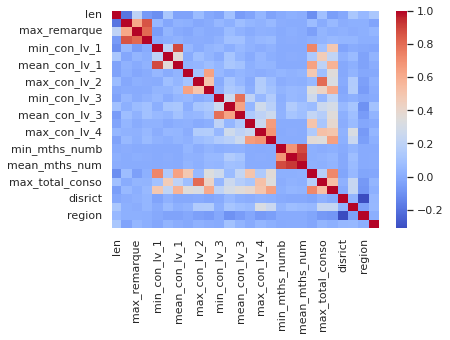

In [135]:
plt.figure()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(total_df.corr(), cmap='coolwarm')
plt.show()

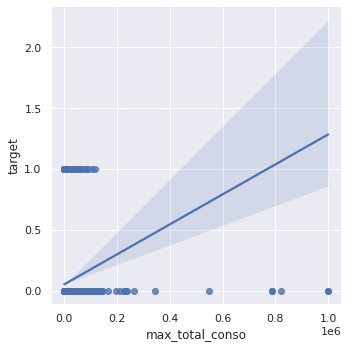

In [138]:
 #ploting the relation between Price(TND) and Garden
sns.lmplot(x='max_total_conso', y='target', data=total_df)

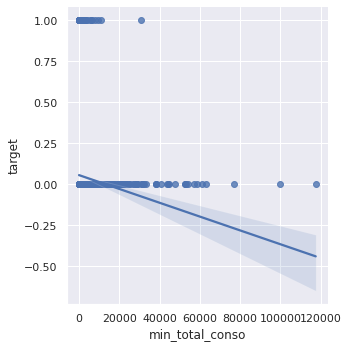

In [139]:
sns.lmplot(x='min_total_conso', y='target', data=total_df)

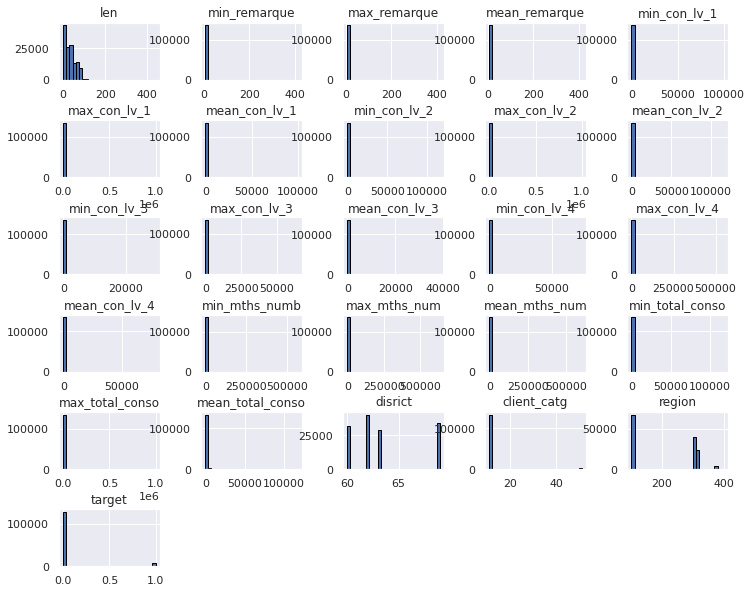

In [140]:
#univariate visualization 
total_df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

# **creation of the model**

In [123]:
#spliting the train data into train and validation
y = total_df.target
X = total_df.drop(['target'], axis = 1)

# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [124]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_valid)
acc_randomforest = round(accuracy_score(y_pred, y_valid) * 100, 2)
print(acc_randomforest)

94.24


In [125]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_valid)
acc_logreg = round(accuracy_score(y_pred, y_valid) * 100, 2)
print(acc_logreg)

94.18


In [126]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_valid)
acc_svc = round(accuracy_score(y_pred, y_valid) * 100, 2)
print(acc_svc)

94.25


In [127]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)
y_pred = decisiontree.predict(X_valid)
acc_decisiontree = round(accuracy_score(y_pred, y_valid) * 100, 2)
print(acc_decisiontree)

89.27


In [128]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_valid)
acc_knn = round(accuracy_score(y_pred, y_valid) * 100, 2)
print(acc_knn)

93.96


In [129]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_valid)
acc_sgd = round(accuracy_score(y_pred, y_valid) * 100, 2)
print(acc_sgd)

94.02


In [130]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.5, max_features=2, max_depth = 2, random_state = 0)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_valid)
acc_Gradien_boost = round(accuracy_score(y_pred, y_valid) * 100, 2)
print(acc_sgd)

94.02


In [131]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_decisiontree,
              acc_sgd, acc_Gradien_boost]})
models.sort_values(by='Score', ascending=False)

Model  Score
0      Support Vector Machines  94.25
3                Random Forest  94.24
6            Gradient Boosting  94.24
2          Logistic Regression  94.18
5  Stochastic Gradient Descent  94.02
1                          KNN  93.96
4                Decision Tree  89.27

In [132]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_valid)
acc_randomforest = round(accuracy_score(y_pred, y_valid) * 100, 2)
print(acc_randomforest)

94.22


In [133]:
y_pred = randomforest.predict(total_test_df)

In [134]:
submission = pd.DataFrame({
        "client_id": total_test_df.index,
        "target": y_pred
    })
submission.to_csv('submission.csv', index=False)